In [27]:
import numpy as np
from matplotlib import pyplot as plt

from monomial_interp import Vandermonde, eval_monomial
from interp import eval_lagrange, evalDDpoly

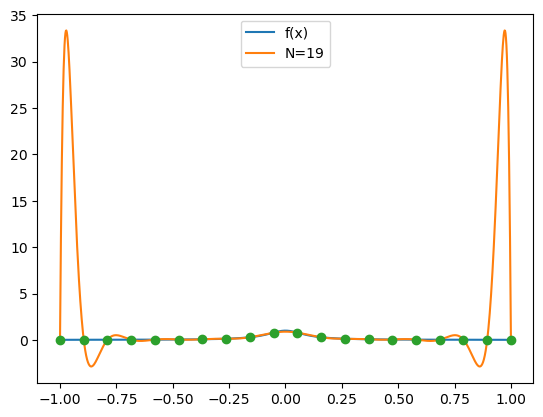

In [24]:
a = -1
b = 1
N = 19
f = lambda x: 1/(1+(10*x)**2)

# interpolating nodes
xint = np.linspace(a, b, N+1)
yint = f(xint)

V = Vandermonde(xint, N)
Vinv = np.linalg.inv(V)
coef = Vinv @ yint

# evaluation points
Neval = 1000
xeval = np.linspace(a, b, Neval+1)
yeval = f(xeval)

plt.plot(xeval, yeval, label='f(x)')
y_mon = eval_monomial(xeval, coef, N, Neval)
plt.plot(xeval, y_mon, label=f'N={N}')
plt.plot(xint, yint, marker='o', linestyle='none')
plt.legend()
plt.show()

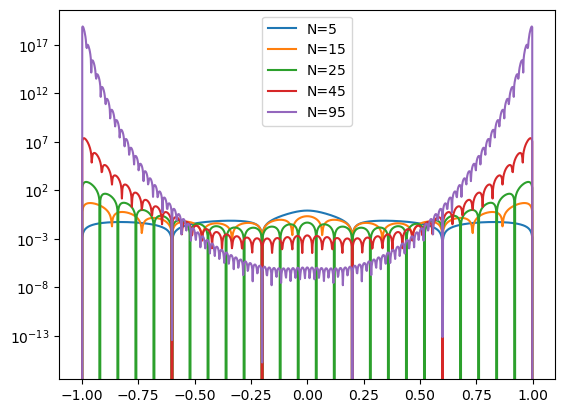

In [61]:
a = -1
b = 1
f = lambda x: 1/(1+(10*x)**2)

# evaluation points
Neval = 1000
xeval = np.linspace(a, b, Neval+1)
yeval = f(xeval)

# plt.plot(xeval, yeval, label='f(x)')
for n in [5,15,25,45,95]:
    # interpolating nodes
    xint = np.linspace(a, b, n+1)
    yint = f(xint)
    lag = np.zeros(Neval+1)
    for i in range(Neval+1):
        lag[i] = eval_lagrange(xeval[i], xint, yint, n)
    plt.semilogy(xeval, np.abs(lag-yeval), label=f'N={n}')
# plt.plot(xint, yint, marker='o', linestyle='none')
plt.legend()
plt.show()

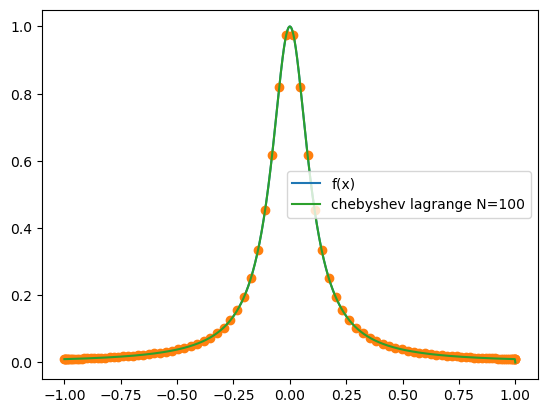

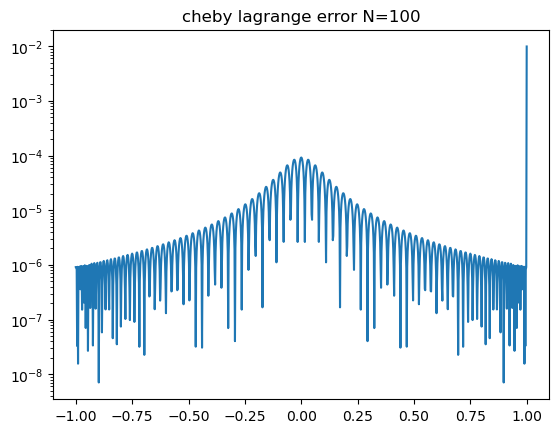

In [83]:
a = -1
b = 1
N = 100
f = lambda x: 1/(1+(10*x)**2)

# interpolating nodes
xint = []
for j in range(1, N+1):
    xint.append(np.cos((((2*j)-1)*np.pi)/(2*N)))
# xint.append(0)
xint = np.array(xint)
yint = f(xint)

# evaluation points
Neval = 1000
xeval = np.linspace(a, b, Neval+1)
yeval = f(xeval)

plt.plot(xeval, yeval, label='f(x)')
plt.plot(xint, yint, marker='o', linestyle='none')

y_lag = np.zeros(Neval+1)
for i in range(Neval):
    y_lag[i] = eval_lagrange(xeval[i], xint, yint, N-1)
plt.plot(xeval, y_lag, label=f'chebyshev lagrange N={N}')

plt.legend()
plt.show()
plt.semilogy(xeval, np.abs(y_lag - yeval))
plt.title(f'cheby lagrange error N={N}')
plt.show()